In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [119]:
((J(-10+0.01) - J(-10))/0.01)*0.5

8.497986384576706

In [114]:
J(-5)

252.7134849328457

In [277]:
# parameters
eps11 = -30 #MHz 
dt  = 1e5 #ns
tau_B = 1e9 #ns
tau_eps = 1e7 #ns
sig_eps = 0.5 #mV
sig_B = 30 #MHz
n = 1000
sig_measure = 1

def J(eps, J0 = 20, J1 = 725, eps0 = 4.4):
    return J0 + J1*np.exp(eps/eps0)

def dJ(eps, J0 = 20, J1 = 725, eps0 = 4.4):
    return J1/eps0*np.exp(eps/eps0)


def eps_J(J, J0 = 20, J1 = 725, eps0 = 4.4):
    return (np.log((J - J0)/J1))*eps0

# single step of o-u process with time step dt, and correlation time tau, and variance sigma
def ou_step(x, dt, tau, sigma):
    return x - dt/tau * x + np.sqrt(dt/tau) * sigma * np.random.randn()

# simulate the o-u process with time step dt, and correlation time tau, and variance sigma
def ou_process(dt, tau, sigma, n):
    x = np.zeros(n)
    x[0]  = np.random.randn()
    for i in range(1, n):
        x[i] = ou_step(x[i-1], dt, tau, sigma)
    return x

# simulate the measurement of the frequency with noise
def measure(B, eps):
    om_ideal = np.sqrt(B**2 + J(eps)**2)
    noise = sig_measure*np.random.randn()
    return om_ideal + noise


# simulate the measurement of the frequencies at two detunigs with noise
def single_run(N, B, deps, feedback=True):
    om11 = np.zeros(N)     
    om02 = np.zeros(N)5
    eps_f = 0
    dom11 = np.zeros(N)
    dom02 = np.zeros(N)
    error_est = np.zeros(N)
    Bs = np.zeros(N)
    ths = np.zeros(N)
    for n in range(N):

        #measurm ent at (1,1)
        B = ou_step(B, dt, tau_B, sig_B)
        deps = ou_step(deps, dt, tau_eps, sig_eps)
        om11[n] = measure(B, eps11+deps+eps_f)
        
        dom11[n] = om11[n] - np.sqrt(B**2 + J(eps11)**2) #Error between estimation and the real om11
        
        #inference of B
        B_est = np.sqrt(om11[n]**2 - J(eps11)**2)  #our estimation of B
        eps02 = eps_J(B_est)
        
        #measurment at (0,2)
        B = ou_step(B, dt, tau_B, sig_B)
        deps = ou_step(deps, dt, tau_eps, sig_eps)
        om02[n] =  measure(B, eps02+deps+eps_f)

        error_est[n] = om02[n] - np.sqrt(2)*B_est 


        dom02[n] = om02[n] - np.sqrt(2)*B  #Error between estimation and the real om02
        
        Bs[n] = B

        #Feedback on eps:
        if feedback:
            eps_f -= om02[n]*error_est[n]/J(eps02)/dJ(eps02)
        else:
            eps_f = 0

        ths[n] = np.arctan2(J(eps02 + deps+eps_f), B)

    return Bs, ths, om11, om02, dom11, dom02

    










SyntaxError: invalid syntax (392051508.py, line 43)

cc

In [278]:
np.random.seed(8151)
Bs,ths_f, om11, om02, dom11, dom02 = single_run(500, 50, 0)

np.random.seed(8151)
Bs,ths, om11, om02, dom11, dom02 = single_run(500, 50, 0, feedback=False)

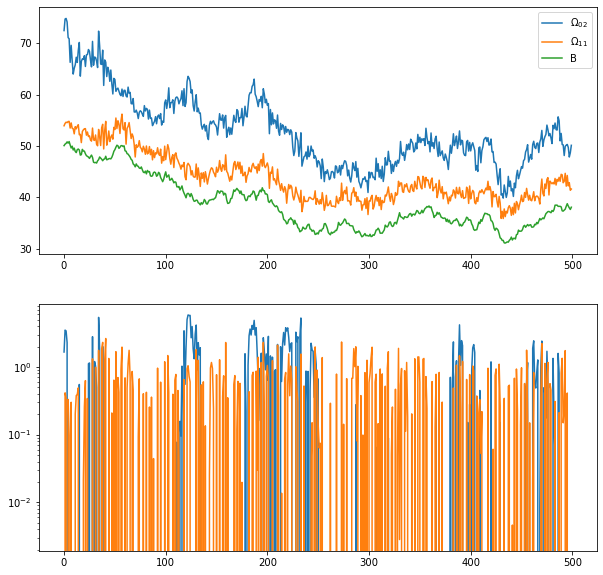

In [279]:
# plot the results om11, om02, and the difference dom11, dom02 on the y-log scale, using two subplots. top: om11, om02, bottom: dom11, dom02
plt.figure(figsize=(10,10))




plt.subplot(2,1,1)
plt.plot(om02, label = r"$\Omega_{02}$")
plt.plot(om11, label = r"$\Omega_{11}$")
plt.plot(Bs, label = "B")
plt.legend()

plt.subplot(2,1,2)
plt.plot(dom02)
plt.plot(dom11)
plt.yscale("log")

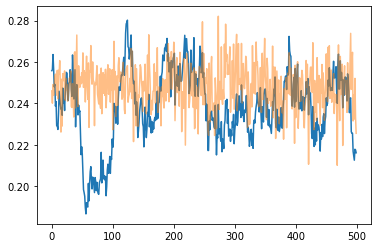

In [280]:
plt.plot(ths/np.pi)
plt.plot(ths_f/np.pi, alpha=0.5)

In [157]:
ths

0.786610406259852